In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import MulticoreTSNE
import fitsne
import LargeVis
import sklearn.manifold
%matplotlib inline

In [1]:
sns.set(style='white', rc={'figure.figsize':(12,8)})

### Pull the data from the internet

MNIST is a traditional clustering data set consisting of a set of 28x28 greyscale images of handwritten digits.  We will do the traditional thing with this data a treat the greyscale images as a 28x28 = 784 long vector and compute Euclidean distance between these vectors. 

In [2]:
%%time
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

CPU times: user 44.8 ms, sys: 49.3 ms, total: 94 ms
Wall time: 113 ms


Each image is flattened into a single 784 long greyscale vector.  

In [3]:
data = mnist.data
labels = mnist.target
data.shape

(70000, 784)

### Now let's use UMAP to embed these points into a two dimensional space.

In [4]:
fit = umap.UMAP(n_neighbors=15, random_state=42, metric='euclidean')
%time u = fit.fit_transform(data)

CPU times: user 1min 26s, sys: 6.81 s, total: 1min 33s
Wall time: 1min 22s


In [5]:
output = pd.DataFrame(u, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_umap1.csv')

In [6]:
pd.DataFrame(u, columns=('x','y')).to_csv('embedding_mnist_umap.csv')

Text(0.5,1,'MNIST data embedded into two dimensions by UMAP')

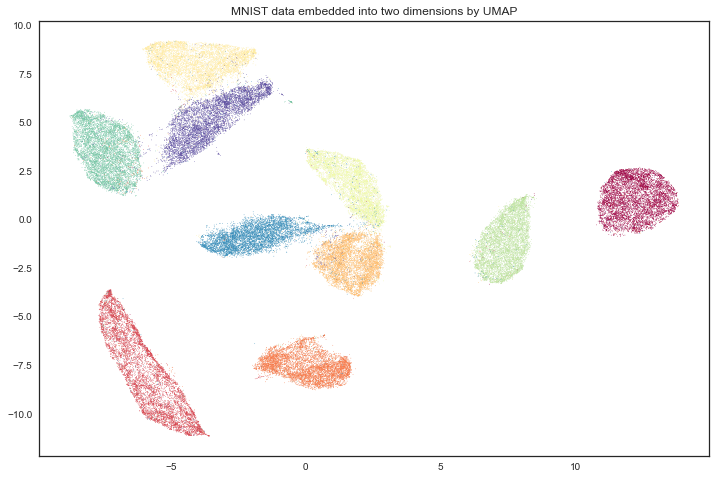

In [7]:
plt.scatter(u[:,0], u[:,1], c=labels, cmap="Spectral", s=0.1)
plt.title('MNIST data embedded into two dimensions by UMAP')

### T-SNE

In [8]:
fit_tsne = MulticoreTSNE.MulticoreTSNE(n_jobs=1, random_state=42)
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 22min 28s, sys: 16.4 s, total: 22min 45s
Wall time: 22min 49s


In [9]:
output = pd.DataFrame(u_tsne, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_tsne1.csv')

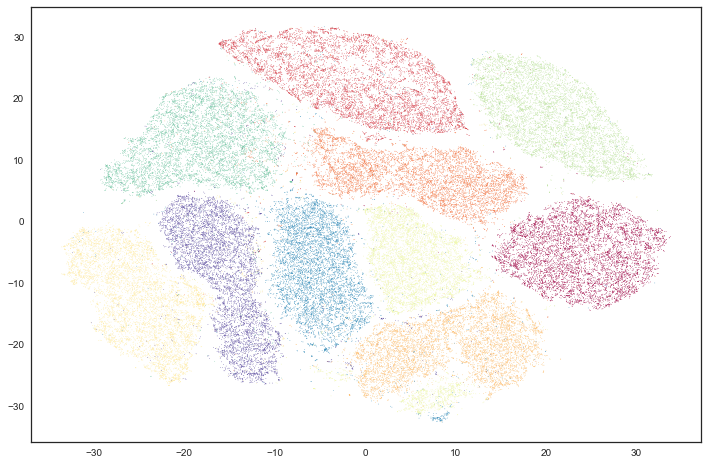

In [10]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=labels, cmap="Spectral", s=0.1)

### PCA

The old standby of PCA which is blindingly fast to compute and often used as an initialization to many of the more complex algorithms.  This isn't really a competitor but instead should be thought of as a strawman.  Given that other algorithms initialize with these values one would hope that they can do better.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
%time u_pca = pca.fit_transform(data)

CPU times: user 3.5 s, sys: 668 ms, total: 4.17 s
Wall time: 2.43 s


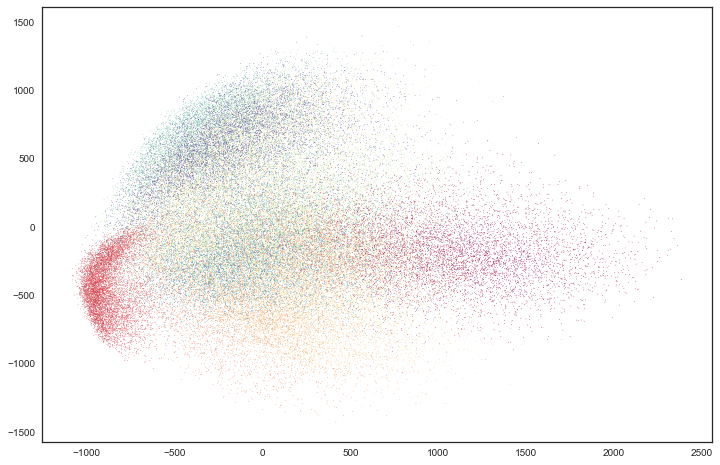

In [12]:
plt.scatter(u_pca[:,0], u_pca[:,1], c=labels, cmap="Spectral", s=0.1)

## FIt-SNE

In [13]:
%time u_fitsne = fitsne.FItSNE(data.astype(np.double), nthreads=1, rand_seed=42)

CPU times: user 4min 44s, sys: 9.01 s, total: 4min 53s
Wall time: 4min 53s


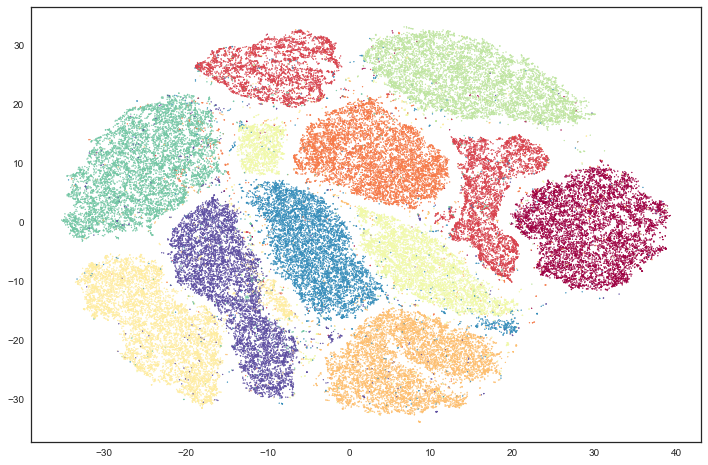

In [14]:
plt.scatter(u_fitsne[:,0], u_fitsne[:,1], c=labels, cmap="Spectral", s=1)

In [15]:
np.save('fitsne_mnist_embedding1.npy', u_fitsne)

In [16]:
output = pd.DataFrame(u_fitsne, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_fitsne1.csv')

## LargeVis

In [17]:
largevis_data = data.astype(np.float32, order='C')
LargeVis.loadarray(largevis_data)

In [18]:
%time u_largevis = LargeVis.run(2, 1)

CPU times: user 37min 28s, sys: 21.1 s, total: 37min 49s
Wall time: 37min 46s


In [19]:
u_largevis = np.array(u_largevis)

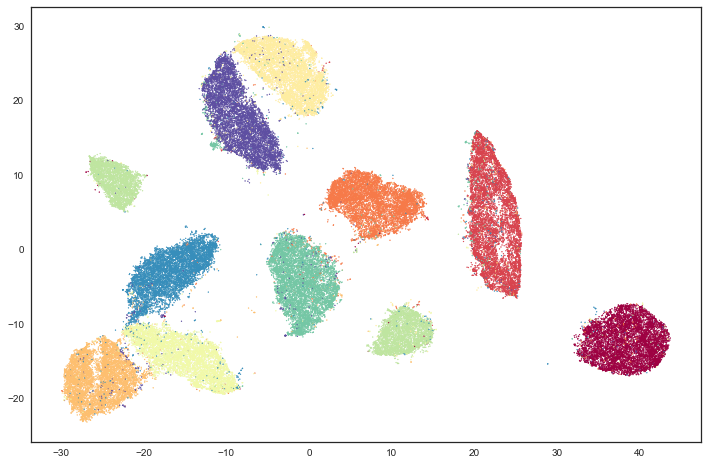

In [20]:
plt.scatter(u_largevis[:,0], u_largevis[:,1], c=labels, cmap="Spectral", s=1)

In [21]:
np.save('largevis_mnist_embedding1.npy', u_largevis)

In [22]:
output = pd.DataFrame(u_largevis, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_largevis1.csv')

## Laplacian Eigenmaps

In [8]:
fit_eigenmaps = sklearn.manifold.SpectralEmbedding(n_neighbors=15)
%time u_eigenmaps = fit_eigenmaps.fit_transform(data)

CPU times: user 22min 28s, sys: 16.4 s, total: 22min 45s
Wall time: 22min 49s


In [9]:
output = pd.DataFrame(u_eigenmaps, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_eigenmaps1.csv')

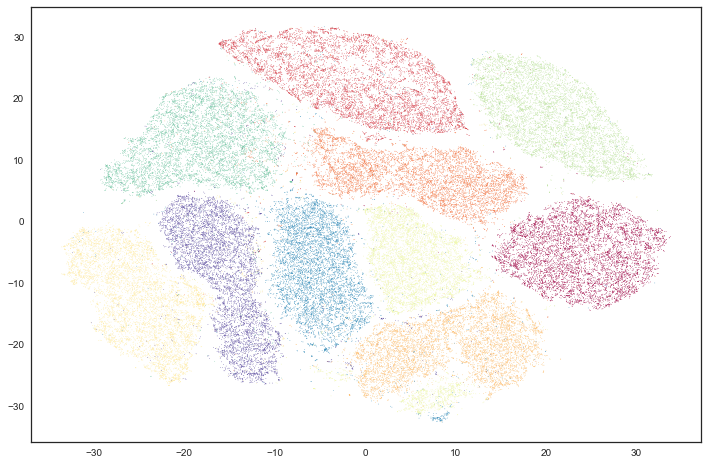

In [10]:
plt.scatter(u_eigenmaps[:,0], u_eigenmaps[:,1], c=labels, cmap="Spectral", s=0.1)

## Isomap

In [8]:
fit_isomap = sklearn.manifold.Isomap()
%time u_isomap = fit_isomap.fit_transform(data)

CPU times: user 22min 28s, sys: 16.4 s, total: 22min 45s
Wall time: 22min 49s


In [9]:
output = pd.DataFrame(u_isomap, columns=('x','y'))
output['labels']=labels
output.to_csv('embedding_mnist_isomap1.csv')

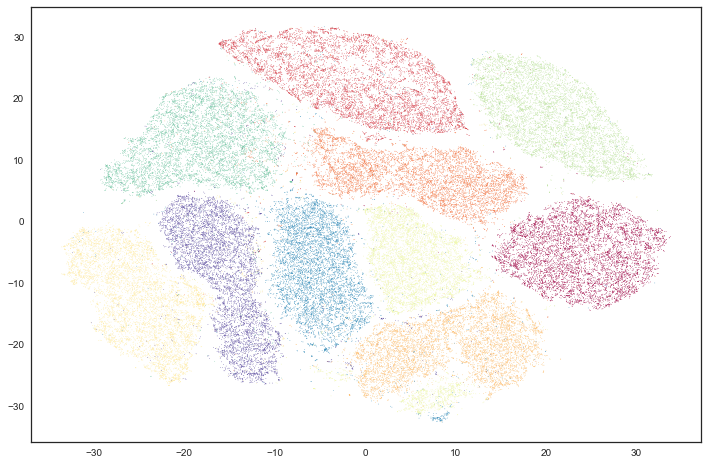

In [10]:
plt.scatter(u_isomap[:,0], u_isomap[:,1], c=labels, cmap="Spectral", s=0.1)